In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

In [3]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [4]:
df_auto = pd.read_csv("Train_dataset_csv.csv")

df_auto.head(100)

people_ID        Region  Gender Designation  \
0   1          Bhubaneshwar  Female  Mrs          
1   2          Bhubaneshwar  Female  Mrs          
2   3          Bhubaneshwar  Female  Mrs          
3   4          Bhubaneshwar  Female  Mrs          
4   5          Bhubaneshwar  Female  Mrs          
5   6          Bhubaneshwar  Female  Mrs          
6   7          Bhubaneshwar  Female  Mrs          
7   8          Bhubaneshwar  Female  Mrs          
8   9          Bhubaneshwar  Female  Mrs          
9   10         Bhubaneshwar  Female  Mrs          
10  11         Bhubaneshwar  Female  Mrs          
11  12         Bhubaneshwar  Female  Mrs          
12  13         Bhubaneshwar  Female  Mrs          
13  14         Bhubaneshwar  Female  Mrs          
14  15         Bhubaneshwar  Female  Mrs          
15  16         Bhubaneshwar  Female  Mrs          
16  17         Bhubaneshwar  Female  Mrs          
17  18         Bhubaneshwar  Female  Mrs          
18  19         Bhubaneshwar  Female  Mrs          
19  20         Bhubaneshwar  Female  Mrs          
20  21         Bhubaneshwar  Female  Mrs          
21  22         Bhubaneshwar  Female  Mrs          
22  23         Bhubaneshwar  Female  Mrs          
23  24         Bhubaneshwar  Female  Mrs          
24  25         Bhubaneshwar  Female  Mrs          
25  26         Bhubaneshwar  Female  Mrs          
26  27         Bhubaneshwar  Female  Mrs          
27  28         Bhubaneshwar  Female  Mrs          
28  29         Bhubaneshwar  Female  Mrs          
29  30         Bhubaneshwar  Female  Mrs          
..  ..                  ...     ...  ...          
70  71         Bhubaneshwar  Female  Mrs          
71  72         Bhubaneshwar  Female  Mrs          
72  73         Bhubaneshwar  Female  Mrs          
73  74         Bhubaneshwar  Female  Mrs          
74  75         Bhubaneshwar  Female  Mrs          
75  76         Bhubaneshwar  Female  Mrs          
76  77         Bhubaneshwar  Female  Mrs          
77  78         Bhubaneshwar  Female  Mrs          
78  79         Bhubaneshwar  Female  Mrs          
79  80         Bhubaneshwar  Female  Mrs          
80  81         Bhubaneshwar  Female  Mrs          
81  82         Bhubaneshwar  Female  Mrs          
82  83         Bhubaneshwar  Female  Mrs          
83  84         Bhubaneshwar  Female  Mrs          
84  85         Bhubaneshwar  Female  Mrs          
85  86         Bhubaneshwar  Female  Mrs          
86  87         Bhubaneshwar  Female  Mrs          
87  88         Bhubaneshwar  Female  Mrs          
88  89         Bhubaneshwar  Female  Mrs          
89  90         Bhubaneshwar  Female  Mrs          
90  91         Bhubaneshwar  Female  Mrs          
91  92         Bhubaneshwar  Female  Mrs          
92  93         Bhubaneshwar  Female  Mrs          
93  94         Bhubaneshwar  Female  Mrs          
94  95         Bhubaneshwar  Female  Mrs          
95  96         Bhubaneshwar  Female  Mrs          
96  97         Bhubaneshwar  Female  Mrs          
97  98         Bhubaneshwar  Female  Mrs          
98  99         Bhubaneshwar  Female  Mrs          
99  100        Bhubaneshwar  Female  Mrs          

                             Name Married  Children     Occupation  \
0   mansi                          YES    1.0000     Farmer          
1   riya masi                      YES    2.0000     Farmer          
2   sunita                         NO     1.0000     Cleaner         
3   anjali @ babli                 YES    1.0000     Driver          
4   champa karketta                NO     2.0000     Manufacturing   
5   sandhya                        YES    1.0000     Clerk           
6   iqra                           YES    2.0000     Manufacturing   
7   renu @ rinki                   YES    1.0000     Manufacturing   
8   kalyani patro                  YES    2.0000     Sales           
9   gurdeep kaur                   YES    1.0000     Farmer          
10  payal goyala                   YES    1.0000     Manufacturing   
1

In [5]:
# shape of the data
df_auto.shape

(10714, 28)

In [6]:
# information of the data
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10714 entries, 0 to 10713
Data columns (total 28 columns):
people_ID                 10714 non-null int64
Region                    10714 non-null object
Gender                    10714 non-null object
Designation               10714 non-null object
Name                      10694 non-null object
Married                   10714 non-null object
Children                  10403 non-null float64
Occupation                9967 non-null object
Mode_transport            10711 non-null object
cases/1M                  10714 non-null int64
Deaths/1M                 10714 non-null int64
comorbidity               10488 non-null object
Age                       10714 non-null int64
Coma score                10714 non-null int64
Pulmonary score           10714 non-null object
cardiological pressure    10617 non-null object
Diuresis                  9998 non-null float64
Platelets                 9790 non-null float64
HBB                       10698 

In [7]:
# dropping people_ID

df_auto = df_auto.drop('people_ID',axis=1)
df_auto = df_auto.drop('Name',axis=1)
df_auto = df_auto.drop('Designation',axis=1)


In [8]:
df_auto = df_auto.drop('Insurance',axis=1)

In [9]:
# 0 - female ; 1- male
df_auto['Gender']=label_encoder.fit_transform(df_auto['Gender'])

#0 - No ;  1 - yes
df_auto['Married']=label_encoder.fit_transform(df_auto['Married'])



df_auto['Pulmonary score']=label_encoder.fit_transform(df_auto['Pulmonary score'])
df_auto['Pulmonary score'].unique()

array([3, 0, 2, 1], dtype=int64)

In [30]:
df_auto['Occupation']=label_encoder.fit_transform(df_auto['Occupation'])
df_auto['Occupation'].unique()

array([4, 1, 3, 6, 2, 8, 9, 0, 7, 5], dtype=int64)

In [10]:
# 0- Bengaluru ; 1 -Bhubneshwar ; 2- chandigardh ;  3- chennai ;  4 - Delhi 
df_auto['Region']=label_encoder.fit_transform(df_auto['Region'])
df_auto['Region'].unique()

array([1, 2, 3, 4, 0], dtype=int64)

In [11]:
# Calculating the Missing Values % contribution in DF

df_null = df_auto.isna().sum() 

df_null.sort_values(ascending=False)

Heart rate                1114
d-dimer                   1114
Platelets                 924 
Occupation                747 
FT/month                  723 
Diuresis                  716 
Children                  311 
comorbidity               226 
cardiological pressure    97  
HDL cholesterol           35  
HBB                       16  
Mode_transport            3   
Infect_Prob               0   
cases/1M                  0   
Gender                    0   
Married                   0   
Pulmonary score           0   
Deaths/1M                 0   
Age                       0   
Coma score                0   
Charlson Index            0   
Blood Glucose             0   
salary                    0   
Region                    0   
dtype: int64

In [12]:
#DROPPING row with null in "mode_trasport" column 
df_auto.drop(df_auto[df_auto['Mode_transport'].isnull()].index, inplace=True)
df_auto['Mode_transport']=label_encoder.fit_transform(df_auto['Mode_transport'])


In [13]:
df_auto['HBB'] = df_auto['HBB'].fillna(df_auto['HBB'].mode()[0])

In [35]:
df_auto = df_auto.fillna({"HDL cholesterol":df_auto["HDL cholesterol"].mean()})
df_auto = df_auto.fillna({"Diuresis":df_auto["Diuresis"].mean()})
df_auto = df_auto.fillna({"Platelets":df_auto["Platelets"].mean()})

In [15]:
#cardiological pressure directly dependent on pulmonary score , so deleting cardiological pressure
df_auto = df_auto.drop('cardiological pressure',axis=1)

In [26]:
# comorbidity indirectly dependent on carlson index , so deleting comorbidity
df_auto = df_auto.drop('comorbidity',axis=1)

In [32]:
df_auto = df_auto.drop('d-dimer',axis=1)

In [16]:

df_auto["Occupation"] = df_auto["Occupation"].fillna("Unknown")

In [24]:
#if a person is not married children colum is set to 0
df_auto['Children'] = df_auto.apply(lambda row: 0 + row['Married'] if np.isnan(row['Children']) else row['Children'],axis =1)

In [18]:
df_auto['Heart rate'] = df_auto.apply(lambda row: 220 - row['Age'] if np.isnan(row['Heart rate']) else row['Heart rate'],axis =1)

In [37]:
df_auto['FT/month'] = df_auto.apply(lambda row: (row['salary']%100000).round(1) if np.isnan(row['FT/month']) else row['FT/month'],axis =1)

In [38]:
df_auto.head(50)

Region  Gender  Married  Children  Occupation  Mode_transport  cases/1M  \
0   1       0       1       1.0000     4           1               2          
1   1       0       1       2.0000     4           2               2          
2   1       0       0       1.0000     1           1               2          
3   1       0       1       1.0000     3           0               2          
4   1       0       0       2.0000     6           0               2          
5   1       0       1       1.0000     2           1               2          
6   1       0       1       2.0000     6           0               2          
7   1       0       1       1.0000     6           1               2          
8   1       0       1       2.0000     8           1               2          
9   1       0       1       1.0000     4           1               2          
10  1       0       1       1.0000     6           1               2          
11  1       0       1       0.0000     3           0               2          
12  1       0       0       0.0000     9           1               2          
13  1       0       1       2.0000     0           1               2          
14  1       0       1       2.0000     6           1               2          
15  1       0       1       1.0000     4           2               2          
16  1       0       1       2.0000     8           1               2          
17  1       0       1       0.0000     7           2               2          
18  1       0       1       1.0000     2           1               2          
19  1       0       1       2.0000     7           1               2          
20  1       0       1       0.0000     7           0               2          
21  1       0       0       0.0000     9           1               2          
22  1       0       0       2.0000     3           1               2          
23  1       0       1       1.0000     1           0               2          
24  1       0       0       2.0000     2           0               2          
25  1       0       1       0.0000     4           1               2          
26  1       0       1       2.0000     6           1               2          
27  1       0       1       1.0000     6           1               2          
28  1       0       1       2.0000     3           1               2          
29  1       0       1       1.0000     6           0               2          
30  1       0       1       0.0000     7           0               2          
31  1       0       1       0.0000     1           0               2          
32  1       0       1       2.0000     5           1               2          
33  1       0       1       2.0000     1           1               2          
34  1       0       1       2.0000     0           1               2          
35  1       0       1       0.0000     1           0               2          
36  1       0       1       2.0000     0           1               2          
37  1       0       1       0.0000     9           0               2          
38  1       0       1       0.0000     4           2               2          
39  1       0       1       2.0000     3           0               2          
40  1       0       1       0.0000     0           1               2          
41  1       0       1       2.0000     8           2               2          
42  1       0       1       0.0000     7           0               2          
43  1       0       1       0.0000     4           0               2          
44  1       0       1       2.0000     1           0               2          
45  1       0       0       0.0000     3           1               2          
46  1       0       1       2.0000     2           1               2          
47  1       0       1       2.0000     1           1               2          
48  1       0       1       1.0000     5           2               2          
49  1       0       1       0.0000     5           0  

In [39]:
# Calculating the Missing Values % contribution in DF

df_null = df_auto.isna().sum() 
df_null.sort_values(ascending=False)

Infect_Prob        0
Coma score         0
Gender             0
Married            0
Children           0
Occupation         0
Mode_transport     0
cases/1M           0
Deaths/1M          0
Age                0
Pulmonary score    0
FT/month           0
Diuresis           0
Platelets          0
HBB                0
Heart rate         0
HDL cholesterol    0
Charlson Index     0
Blood Glucose      0
salary             0
Region             0
dtype: int64

In [40]:

df_auto.loc[df_auto.duplicated()]

Empty DataFrame
Columns: [Region, Gender, Married, Children, Occupation, Mode_transport, cases/1M, Deaths/1M, Age, Coma score, Pulmonary score, Diuresis, Platelets, HBB, Heart rate, HDL cholesterol, Charlson Index, Blood Glucose, salary, FT/month, Infect_Prob]
Index: []

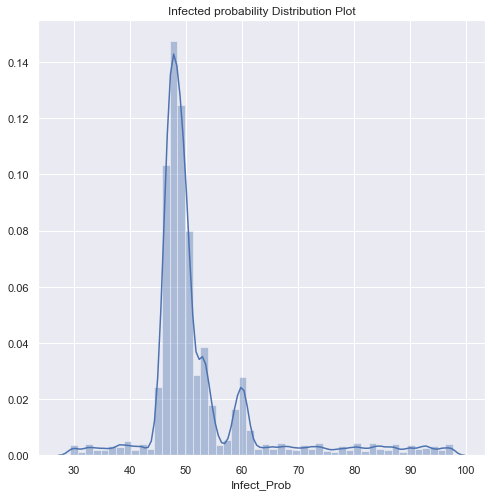

In [41]:
plt.figure(figsize=(8,8))

plt.title('Infected probability Distribution Plot')
sns.distplot(df_auto['Infect_Prob'])

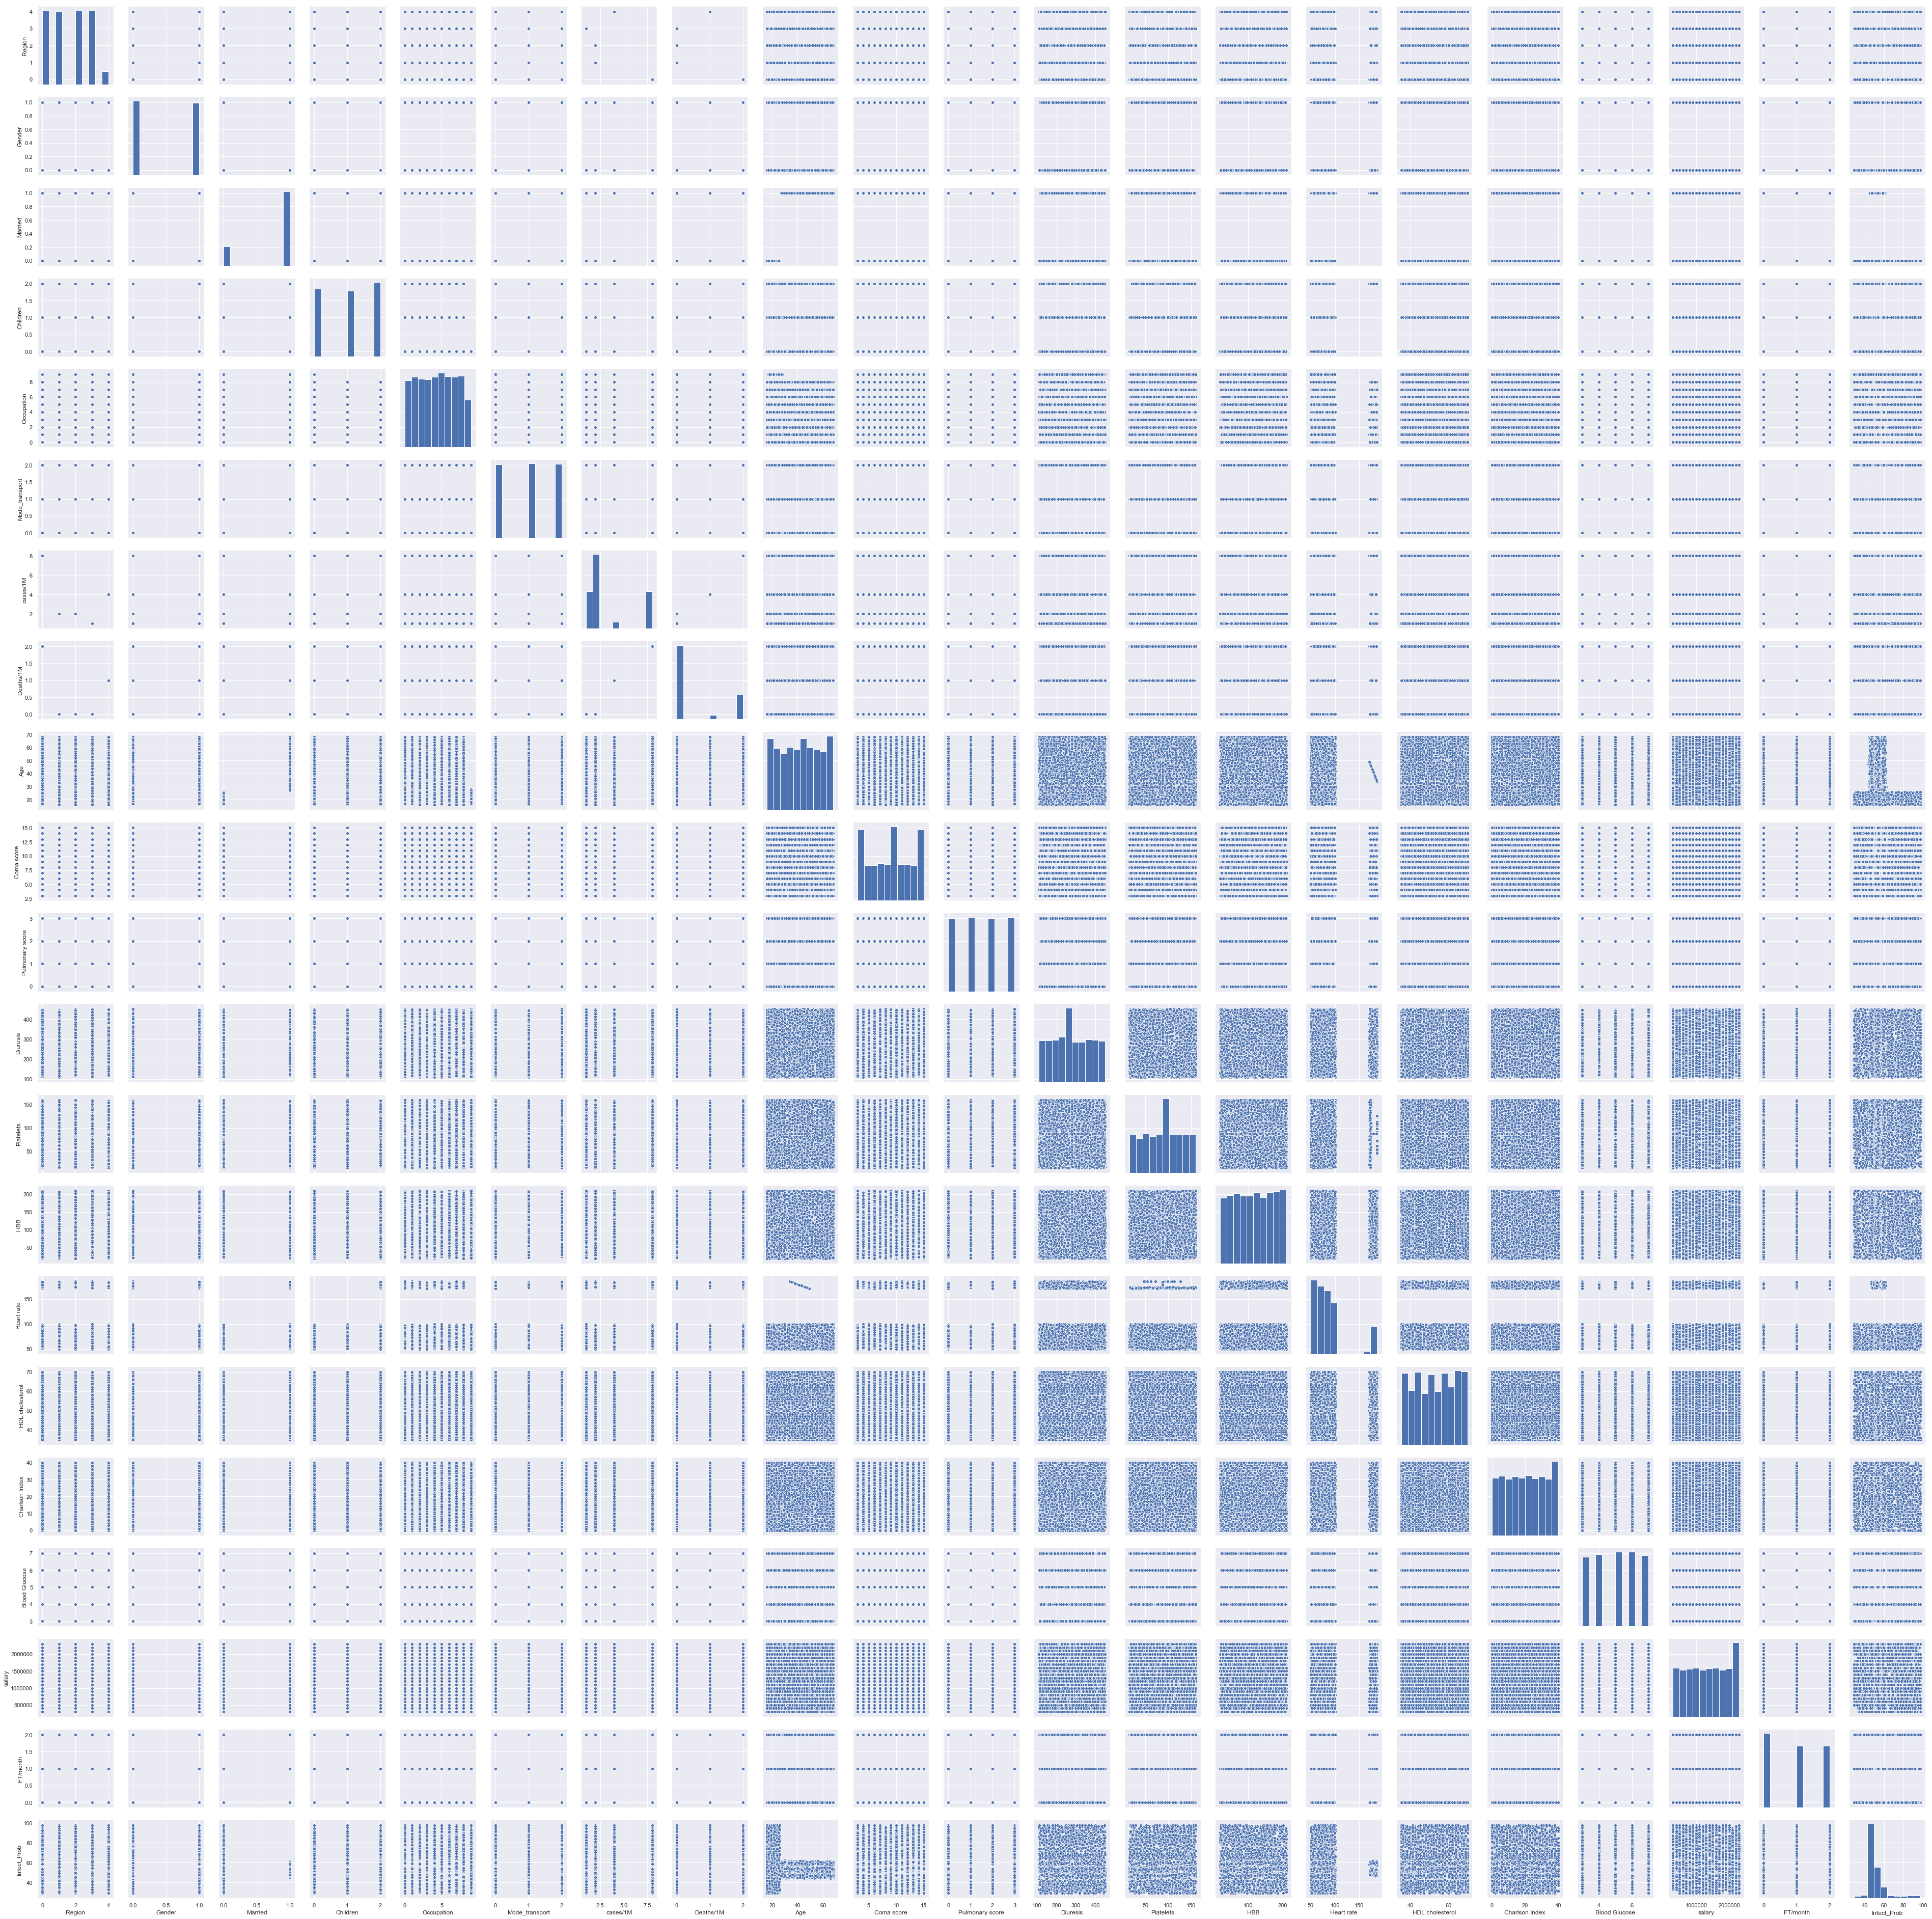

In [43]:

ax = sns.pairplot(df_auto[:])

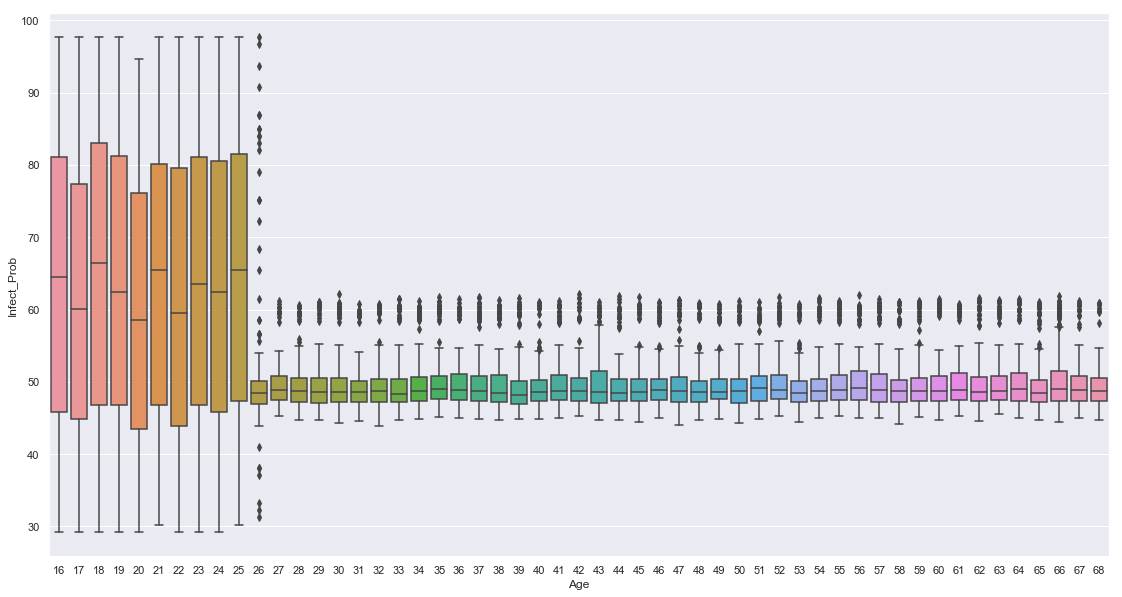

In [48]:
plt.figure(figsize = (19, 10))
sns.boxplot(x = 'Age', y = 'Infect_Prob', data = df_auto)
plt.show()

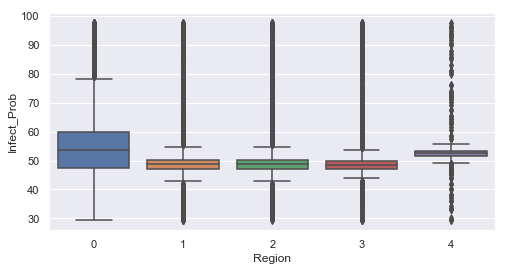

In [51]:
plt.figure(figsize = (8,4))
sns.boxplot(x = 'Region', y = 'Infect_Prob', data = df_auto)
plt.show()

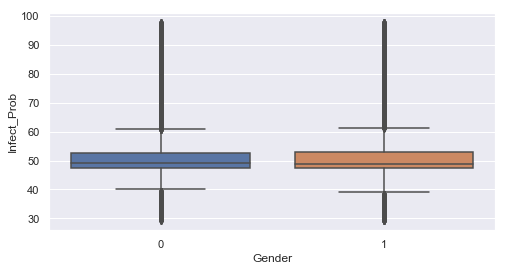

In [53]:
plt.figure(figsize = (8, 4))
sns.boxplot(x = 'Gender', y = 'Infect_Prob', data = df_auto)
plt.show()

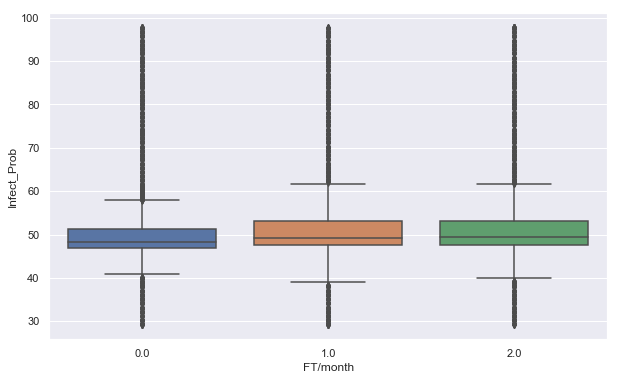

In [56]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'FT/month', y = 'Infect_Prob', data = df_auto)
plt.show()

<Figure size 2160x720 with 0 Axes>

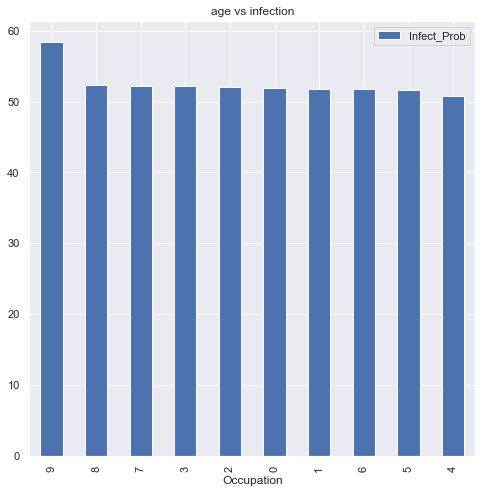

In [65]:
plt.figure(figsize=(30, 10))

df_autox = pd.DataFrame(df_auto.groupby(['Occupation'])['Infect_Prob'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('age vs infection')
plt.show()

In [76]:
df_train = df_auto.iloc[:,:-1]
df_test = pd.read_csv('')

In [77]:
df_train.head()

Region  Gender  Married  Children  Occupation  Mode_transport  cases/1M  \
0  1       0       1       1.0000     4           1               2          
1  1       0       1       2.0000     4           2               2          
2  1       0       0       1.0000     1           1               2          
3  1       0       1       1.0000     3           0               2          
4  1       0       0       2.0000     6           0               2          

   Deaths/1M  Age  Coma score  Pulmonary score  Diuresis  Platelets      HBB  \
0  0          68   8           3               441.0000  154.0000   93.0000    
1  0          64   15          0               278.8272  121.0000   56.0000    
2  0          19   13          2               416.0000  124.0000   137.0000   
3  0          33   9           1               410.0000  98.0000    167.0000   
4  0          23   7           3               390.0000  21.0000    153.0000   

   Heart rate  HDL cholesterol  Charlson Index  Blood Glucose   salary  \
0 82.0000     58.0000           27              7              1300000   
1 89.0000     68.0000           5               6              400000    
2 77.0000     43.0000           40              6              900000    
3 64.0000     60.0000           27              7              2300000   
4 71.0000     64.0000           32              7              1100000   

   FT/month  
0 2.0000     
1 1.0000     
2 1.0000     
3 1.0000     
4 1.0000

In [ ]:
scaler = preprocessing.StandardScaler()